# Import Required libraries

In [1]:
# Basic libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# tensorflow libraries
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import (Input,
                                     Dense, 
                                     Conv2D,
                                     Dropout)
from tensorflow.keras.optimizers import (Adam,
                                         RMSprop)


/Users/kavisanthoshkumar/Library/CloudStorage/OneDrive-IllinoisInstituteofTechnology/Tensorflow/tensorflow_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


# Load Dataset - Mnist Dataset

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")

Shape of X_train: (60000, 28, 28)
Shape of X_test: (10000, 28, 28)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


#### 1. Sample Visualization

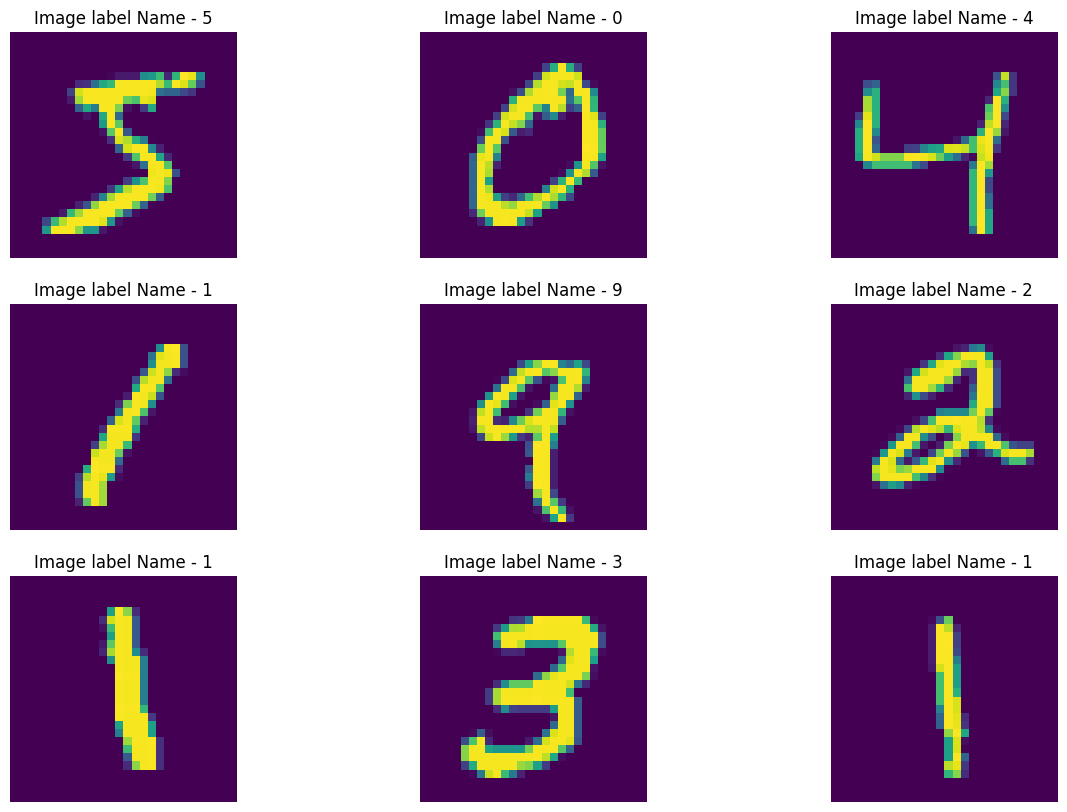

In [9]:
plt.figure(figsize= (15, 10))
for i in range(9):
    ax = plt.subplot(3, 3, i+1)
    plt.imshow(X_train[i, :, :])
    plt.title(f"Image label Name - {y_train[i]}")
    plt.axis('off')
plt.show()